3-Classification
================

**Author:** Cumhur Erkut

<a href="https://colab.research.google.com/github/SMC-AAU-CPH/ML-For-Beginners/blob/main/3-Classification/images/3-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
try:
  import google.colab
  IN_COLAB = True
  ! mkdir -p ../data
  ! wget https://raw.githubusercontent.com/SMC-AAU-CPH/ML-For-Beginners/main/3-Classification/data/cuisines.csv -P ../data
  ! pip install imblearn skl2onnx==1.15.0 --quiet
except:
  IN_COLAB = False

--2023-10-13 12:35:12--  https://raw.githubusercontent.com/SMC-AAU-CPH/ML-For-Beginners/main/3-Classification/data/cuisines.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1912789 (1.8M) [text/plain]
Saving to: ‘../data/cuisines.csv’

cuisines.csv        100%[===================>]   1.82M  --.-KB/s    in 0.03s   

2023-10-13 12:35:12 (67.8 MB/s) - ‘../data/cuisines.csv’ saved [1912789/1912789]



## 1. Introduction to classification

Some resources for ML Algorithms:

-   [https://saturncloud.io/glossary/](https://saturncloud.io/glossary/)
-   [2 Machine Learning General - Google Slides](https://docs.google.com/presentation/d/1qSOwBrjEmZTXQqNqB9XRAV7QsB6SJrLZ4pZBCkpvzyA/edit#slide=id.gf297669038_0_129)

This section is all about balancing and resaving the data.

### Pre-lecture quiz



Q: Multiclass. Given ingredients, which cousine?

-   [X] Classification, regression relationship
-   [X] First step: analyze and balance your data\*



### Hello classifier



-   **multiclass:** Given a batch of indgedient, which of these cuisines (multiple class) will the data fit?

-   [ ] Define classification
-   [ ] Take a moment to imagine a dataset about cuisines
    -   [ ] What can a binary model answer?
        
            given a present of a grocery bag full of star anise, artichokes, cauliflower, and horseradish, can we create a typical Indian dish?
    -   [ ] What can a multiclass model answer?
        
            Which cuisine is likely to use fenugreek?



### Exercise: (Clean and balance) your data



In [9]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

df = pd.read_csv('../data/cuisines.csv')
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Exercise: Learning about cuisines



<Axes: >

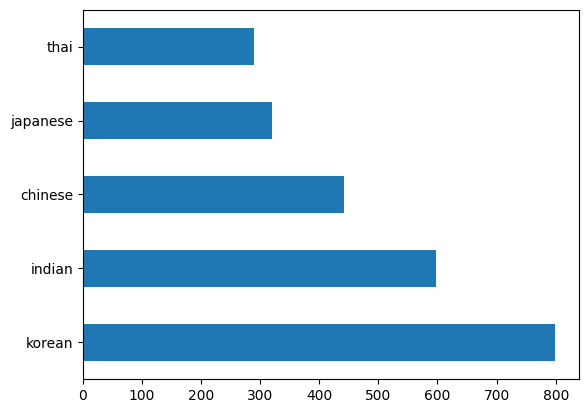

In [10]:
df.cuisine.value_counts().plot.barh()

In [11]:
    thai_df = df[(df.cuisine == "thai")]
    japanese_df = df[(df.cuisine == "japanese")]
    chinese_df = df[(df.cuisine == "chinese")]
    indian_df = df[(df.cuisine == "indian")]
    korean_df = df[(df.cuisine == "korean")]

    print(f'thai df: {thai_df.shape}')
    print(f'japanese df: {japanese_df.shape}')
    print(f'chinese df: {chinese_df.shape}')
    print(f'indian df: {indian_df.shape}')
    print(f'korean df: {korean_df.shape}')


thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


What are the typical ingredients per cuisine?
First, clean out recurrent data that creates confusion between cuisines.

<Axes: >

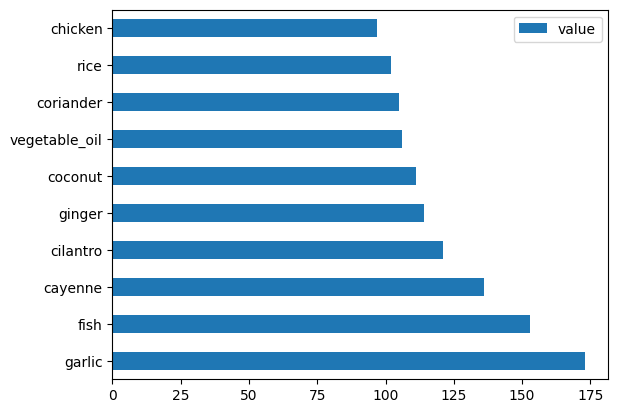

In [12]:
    def create_ingredient_df(df):
        ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
        ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
        ingredient_df = ingredient_df.sort_values(by='value', ascending=False, inplace=False)
        return ingredient_df

    thai_ingredient_df = create_ingredient_df(thai_df)
    thai_ingredient_df.head(10).plot.barh()


In [13]:

    japanese_ingredient_df = create_ingredient_df(japanese_df)
#    japanese_ingredient_df.head(10).plot.barh()
    chinese_ingredient_df = create_ingredient_df(chinese_df)
#    chinese_ingredient_df.head(10).plot.barh()
    indian_ingredient_df = create_ingredient_df(indian_df)
#    indian_ingredient_df.head(10).plot.barh()
    korean_ingredient_df = create_ingredient_df(korean_df)
#    korean_ingredient_df.head(10).plot.barh()

Drop Unnamed column and most frequent ingredients

In [14]:

    feature_df = df.drop(['cuisine', 'Unnamed: 0','rice', 'garlic', 'ginger'], axis=1)
    labels_df = df.cuisine #.unique()
    feature_df.head()


,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Balance the dataset using SMOTE



Balance data with SMOTE oversampling to the highest class. Read more here: [https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTE.html](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTE.html)


In [15]:

    oversample = SMOTE()
    transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

    print(f'new label count: {transformed_label_df.value_counts()}')
    print(f'old label count: {df.cuisine.value_counts()}')


new label count: indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: cuisine, dtype: int64
old label count: korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64


In [16]:

    transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')
    transformed_df.head()
    transformed_df.info()
    transformed_df.to_csv("../data/cleaned_cuisines.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, cuisine to zucchini
dtypes: int64(380), object(1)
memory usage: 11.6+ MB


### 🚀Challenge, Post-lecture quiz, Review & Self Study



## 2. More classifiers: [Logistic Regression](https://paperswithcode.com/method/logistic-regression) (and [Support Vector](https://paperswithcode.com/method/svm) Classifiers)

    Assumption: a cleaned_cuisines.csv file exists in the root ../data folder for these four lessons.



### Exercise: predict a national cuisine



In [17]:
    import pandas as pd
    cuisines_df = pd.read_csv("../data/cleaned_cuisines.csv")
    cuisines_df.head()

    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
    from sklearn.svm import SVC
    import numpy as np

    cuisines_label_df = cuisines_df['cuisine']
    cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)


In [21]:
    # Logistic Regression
    lr = LogisticRegression(multi_class='ovr',solver='liblinear')
    model = lr.fit(X_train, np.ravel(y_train))

    accuracy = model.score(X_test, y_test)
    print ("Accuracy is {}".format(accuracy))


Accuracy is 0.810675562969141


In [22]:
    # Test classification instance
    print(f'ingredients: {X_test.iloc[50][X_test.iloc[50]!=0].keys()}')
    print(f'cuisine: {y_test.iloc[50]}')

    test= X_test.iloc[50].values.reshape(-1, 1).T
    proba = model.predict_proba(test)
    classes = model.classes_
    resultdf = pd.DataFrame(data=proba, columns=classes)

    topPrediction = resultdf.T.sort_values(by=[0], ascending = [False])
    topPrediction.head()


ingredients: Index(['avocado', 'cucumber', 'seaweed', 'vinegar'], dtype='object')
cuisine: japanese


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,0
japanese,0.917441
korean,0.052738
thai,0.016552
chinese,0.007835
indian,0.005434


In [23]:
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.74      0.70      0.72       245
      indian       0.91      0.90      0.90       229
    japanese       0.80      0.81      0.80       272
      korean       0.85      0.81      0.83       223
        thai       0.76      0.84      0.80       230

    accuracy                           0.81      1199
   macro avg       0.81      0.81      0.81      1199
weighted avg       0.81      0.81      0.81      1199



### 🚀Challenge, Post-lecture quiz, Review & Self Study



## 3. Yet other classifiers



We assume that you have completed the previous lessons and have a cleaned dataset in your \`data\` folder called <u>cleaned\_cuisines.csv</u>.



### A classification map ([interactive version in your browser](https://scikit-learn.org/stable/tutorial/machine_learning_map/)): The plan, hacked code



![img](https://github.com/SMC-AAU-CPH/ML-For-Beginners/blob/main/3-Classification/3-Classifiers-2/images/map.png?raw=1)

-   [ ] Linear SVC
-   [ ] KNN
-   [ ] SVC
-   [ ] Ensemble (FRST, ADA)


In [24]:
    import pandas as pd
    cuisines_df = pd.read_csv("../data/cleaned_cuisines.csv")
    cuisines_label_df = cuisines_df['cuisine']
    cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)

    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
    import numpy as np

    X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)


In [25]:
    C = 10
    # Create different classifiers.
    classifiers = {
        'Linear SVC': SVC(kernel='linear', C=C, probability=True,random_state=0),
        'KNN classifier': KNeighborsClassifier(C),
        'SVC': SVC(),
        'RFST': RandomForestClassifier(n_estimators=100),
        'ADA': AdaBoostClassifier(n_estimators=100)
    }

    import warnings
    # Filter out user warnings due to SVC and KNN usesr warnings
    warnings.filterwarnings("ignore", category=UserWarning)

    n_classifiers = len(classifiers)

    for index, (name, classifier) in enumerate(classifiers.items()):
        classifier.fit(X_train, np.ravel(y_train))
        X_test = np.ascontiguousarray(X_test) # fixes KNN c_contiguous array error
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
        print(classification_report(y_test,y_pred))

Accuracy (train) for Linear SVC: 78.6% 
              precision    recall  f1-score   support

     chinese       0.72      0.70      0.71       251
      indian       0.86      0.91      0.88       214
    japanese       0.74      0.75      0.74       232
      korean       0.85      0.75      0.80       264
        thai       0.76      0.84      0.80       238

    accuracy                           0.79      1199
   macro avg       0.79      0.79      0.79      1199
weighted avg       0.79      0.79      0.78      1199

Accuracy (train) for KNN classifier: 72.0% 
              precision    recall  f1-score   support

     chinese       0.65      0.72      0.68       251
      indian       0.77      0.86      0.81       214
    japanese       0.61      0.81      0.70       232
      korean       0.92      0.56      0.69       264
        thai       0.77      0.68      0.72       238

    accuracy                           0.72      1199
   macro avg       0.74      0.73      0.72    

### 🚀Challenge, Post-lecture quiz, Review & Self Study



There's a lot of jargon in these lessons, so take a minute to review [this list](https://docs.microsoft.com/dotnet/machine-learning/resources/glossary?WT.mc_id=academic-77952-leestott) of useful terminology!



## 4. Applied ML: build a web app



-   [ ] How to build a model and save it as an Onnx model
-   [ ] How to use Netron to inspect the model
-   [ ] How to use your model in a web app for inference



### [Pre-lecture quiz](https://gray-sand-07a10f403.1.azurestaticapps.net/quiz/25/)



### Build your model



*build a basic JavaScript-based system for inference. First, however, you need to train a model and convert it for use with Onnx*.

[Open Neural Network Exchange (ONNX)](https://onnx.ai/) is an open standard format for representing machine learning models. See the basit tutorials at [https://github.com/onnx/tutorials](https://github.com/onnx/tutorials)



#### Exercise: Train classification model



In [30]:
    # ! mamba install skl2onnx==1.15.0
    # the above in VSCode, the below on Colab
    # ! pip install --quiet skl2onnx
    import pandas as pd

    data = pd.read_csv('../data/cleaned_cuisines.csv')
    X = data.iloc[:,2:]
    y = data[['cuisine']]

    from sklearn.model_selection import train_test_split
    from sklearn.svm import SVC
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


/bin/bash: line 1: import: command not found


In [27]:
    # SVC
    model = SVC(kernel='linear', C=10, probability=True,random_state=0)
    model.fit(X_train,y_train.values.ravel())

SVC(C=10, kernel='linear', probability=True, random_state=0)

In [28]:
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.71      0.70      0.71       226
      indian       0.88      0.85      0.86       226
    japanese       0.80      0.77      0.79       252
      korean       0.84      0.79      0.81       227
        thai       0.76      0.86      0.81       268

    accuracy                           0.80      1199
   macro avg       0.80      0.79      0.80      1199
weighted avg       0.80      0.80      0.80      1199



In [ ]:
    # ONNX EXPORT

    from skl2onnx import convert_sklearn
    from skl2onnx.common.data_types import FloatTensorType

    initial_type = [('float_input', FloatTensorType([None, 380]))]
    # ** Note the options: nocl: no class info embedded (smaller filesize). zipmap: list of dictionaries
    options = {id(model): {'nocl': True, 'zipmap': False}}

    onx = convert_sklearn(model, initial_types=initial_type, options=options)
    with open("./model.onnx", "wb") as f:
        f.write(onx.SerializeToString())



### OPTIONAL View your model using [netron](https://github.com/lutzroeder/netron)



#### MAC
    # brew install netron
    # open model.onnx
#### WIN
    winget install -s winget netron

![img](https://github.com/SMC-AAU-CPH/ML-For-Beginners/blob/main/3-Classification/4-Applied/images/netron.png?raw=1)



### Build a recommender web application (by writing index.html and js, then running http-server) then test



Better way: FastAPI! Wait for it (4-Web-App)
Best to check [../4-Applied/solution/index.html](../4-Applied/solution/index.html)



### 🚀Challenge, Post-lecture quiz, Review & Self Study



## 5. Convolutional Neural Nets



### Interactively: [https://poloclub.github.io/cnn-explainer/](https://poloclub.github.io/cnn-explainer/)



### Using scikit-learn MLP as a proxy to CNN



    After [Training CNN with Images in Sklearn Neural Net: A Step-by-Step Guide | Saturn Cloud Blog](https://saturncloud.io/blog/training-cnn-with-images-in-sklearn-neural-net-a-stepbystep-guide/)


In [33]:

    from sklearn.datasets import load_digits
    from skimage import color
    from skimage.transform import resize
    # Load sample images: other datasets load_digits() and load_iris()
    X,y = load_digits(return_X_y=True)
    # X = dataset.images
    # y = dataset.target

    # Commented parts for possible preprocessing using scikit-image
    # Preprocessing: resize, grayscale, normalize pixel values etc
    # import numpy as np
    # from sklearn.preprocessing import StandardScaler

    # Resize images
    # X_resized = np.array([resize(image, (64, 64), anti_aliasing=True) for image in X])
    # Convert to grayscale
    # X_gray = np.array([color.rgb2gray(image) for image in X_resized])

    # Normalize pixel values
    # scaler = StandardScaler()
    # X_scaled = scaler.fit_transform(X_gray.reshape(-1, 64 * 64))

    # Train - test split
    from sklearn.model_selection import train_test_split

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### Model: we fake a MLP with relu activation as CNN



In [34]:
    from sklearn.neural_network import MLPClassifier

    # Define MLPClassifier as CNN: 8x8 is flattened in the input layer, then progressively shrinked
    mlp = MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', max_iter=500)

    # Compile and fit the model
    mlp.fit(X_train, y_train)
    score = mlp.score(X_test, y_test)
    print(f"Accuracy: {score}")



Accuracy: 0.9694444444444444


#### Improve the Model Performance?

In [35]:
    # Increase model complexity
    mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000)
    mlp.fit(X_train, y_train)
    score = mlp.score(X_test, y_test)
    print(f"Accuracy: {score}")


Accuracy: 0.9722222222222222


In [36]:

    # Use SGD optimizer
    mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='sgd', max_iter=500)
    mlp.fit(X_train, y_train)
    score = mlp.score(X_test, y_test)
    print(f"Accuracy: {score}")



Accuracy: 0.9694444444444444


In [37]:


    # Use SGD optimizer with a low initial learning rate
    mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='sgd', learning_rate_init=0.001, max_iter=500)
    mlp.fit(X_train, y_train)
    score = mlp.score(X_test, y_test)
    print(f"Accuracy: {score}")

Accuracy: 0.9555555555555556


#### Data augmentation (requires skimage)



## Assignment: Parametrization of classification algorithms



There are a lot of parameters that are set by default when working with these classifiers. Intellisense in VS Code can help you dig into them. Adopt one of the ML Classification Techniques in this lesson and retrain models tweaking various parameter values.

Build a notebook explaining why some changes help the model quality while others degrade it. Be detailed in your answer.

For example,

-   In [linear SVC](https://scikit-learn.org/stable/modules/svm.html#classification),
    -   Increasing C results in better model quality
    
    -   Increasing max iterations results in better model quality
    
    -   Increasing tolerance results in worse model quality

-   In [KNN](https://saturncloud.io/glossary/knn/),
    -   Increasing n\_neighbors results in better model quality
    
    -   Increasing p results in better model quality
    
    -   Increasing tolerance results in worse model quality

